In [1]:
from WindPy import w
w.start() # 默认命令超时时间为120秒，如需设置超时时间可以加入waitTime参数，例如waitTime=60,即设置命令超时时间为60秒  

w.isconnected() # 判断WindPy是否已经登录成功

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2020 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


True

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.font_manager as fm

# 绘制选定股票价格与时间的关系

In [3]:
#输入变量

btime = '20190925'
ctime = '20200925'
name = "600109.SH"

cls = w.wsd(name, "close", beginTime = btime, endTime = ctime)
opn = w.wsd(name, "open", beginTime = btime, endTime = ctime)

In [87]:
w.wsd(name, "close", beginTime = btime, endTime = ctime)

.ErrorCode=0
.Codes=[600109.SH]
.Fields=[CLOSE]
.Times=[20190925,20190926,20190927,20190930,20191008,20191009,20191010,20191011,20191014,20191015,...]
.Data=[[9.01,8.83,8.85,8.71,8.7,8.74,8.76,8.86,8.97,8.84,...]]

<function matplotlib.pyplot.show(*args, **kw)>

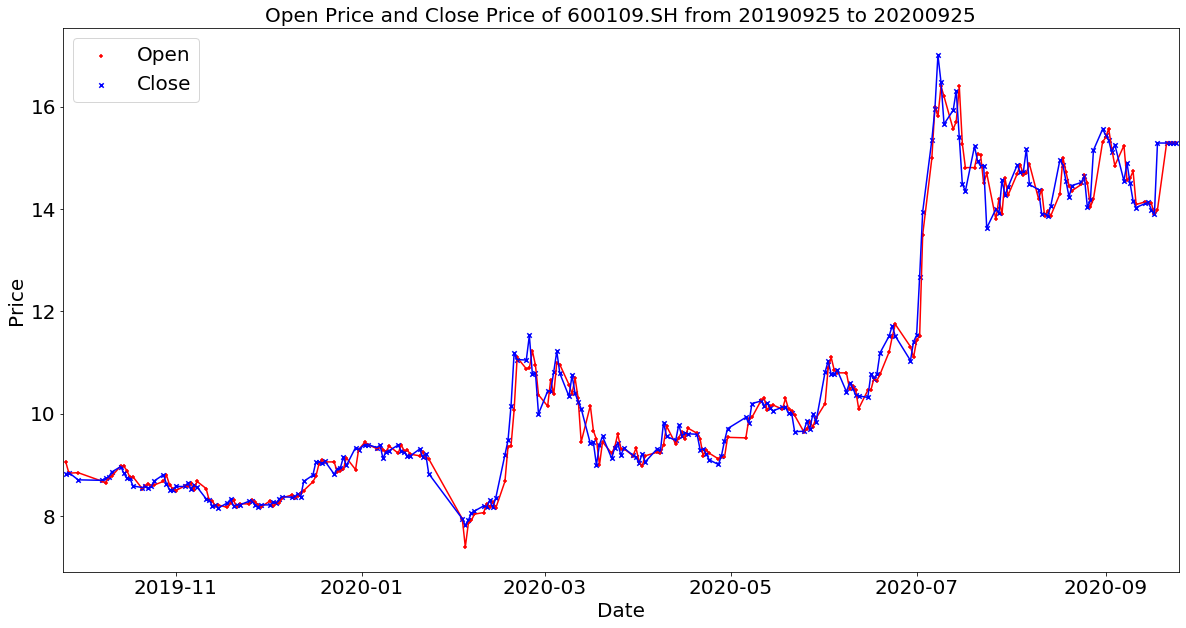

In [4]:
#图像绘制

plt.figure(figsize=(20,10))

p_o = plt.scatter(opn.Times[1:-1], opn.Data[0][1:-1], marker = '+', color = 'r', s = 20)
plt.plot(opn.Times[1:-1], opn.Data[0][1:-1], color = 'r')
p_c = plt.scatter(cls.Times[1:-1], cls.Data[0][1:-1], marker = 'x', color = 'b', s = 20)
plt.plot(cls.Times[1:-1], cls.Data[0][1:-1], color = 'b')
plt.tick_params(axis='both',which='major',labelsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Price',fontsize = 20)
plt.xlim ([opn.Times[0], opn.Times[-1]])
plt.title("Open Price and Close Price of " + str(name) + " from " + str(btime) + " to " + str(ctime), size = 20)
plt.legend((p_o, p_c), ('Open', 'Close'), loc = 2, fontsize = 20)


plt.show

# 调用宏观经济指标

## 基础

In [79]:
#输入变量
#就业形势报告， 周度失业救济申请， 个人收入和支出， 零售额， 国内生产总值， 供应管理研究协会制造业调查，
#工业产值和产能利用， 新屋开工和建造许可，消费者物价指数CPI，生产者物价指数PPI
new_nonagr = 'G1137704'
unem = 'G0000067'

p_income = 'G0003879'
p_exp = 'G0003882'
retail = 'G1112987'

gdp = 'G0000003' #季度
ind_ind = 'G1120821'
ind_use = 'G1110601'
man_out = 'G0003713'
man_in = 'G0003715'
man_unfin = 'G0003717'
man_new = 'G0003719'

new_house = 'G0003622'
new_per = ['G1123435', 'G1123442','G1123446','G1123452','G1123460','G1123470','G1123475','G1123480','G1123489']
per_name = ['新英格兰','中大西洋','中部东北','中部西北','南大西洋','中部东南','中部西南','山脉','太平洋']
new_hs = 'G0003650'

cpi_tongbi = 'G0000029'
cpi_huanbi = 'G0000033'
ppi = 'G1138391'

ecri = 'G1100287'
pmi = 'G0002323'



#十年国债收益率
bond_10y = 'G0000891'


#始末时间
t0 = '2018-01-01'
tn = '2020-10-01'

## 就业

Text(0.5, 1.0, '美国2018年1月至2020年10月新增非农就业人数（千人）')

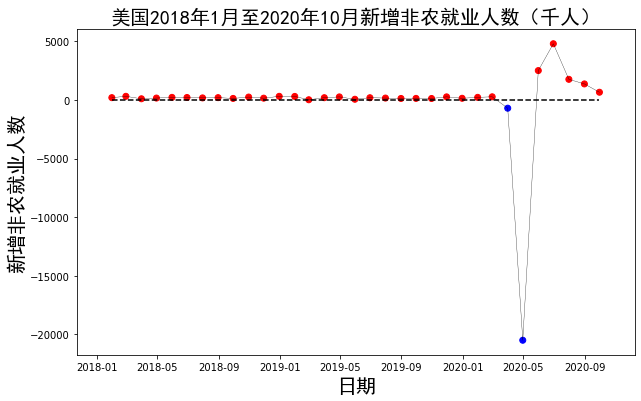

In [18]:
#非农业新增就业
plt.figure(figsize=(10,6))

x = new_nonagr
co = ['b', 'r']

plt.scatter(w.edb(x, t0, tn).Times, w.edb(x, t0, tn).Data[0], 
            c = [co[i >= 0] for i in w.edb(new_nonagr, t0, tn).Data[0]])
plt.plot(w.edb(new_nonagr, t0, tn).Times, w.edb(new_nonagr, t0, tn).Data[0], color = 'black', linewidth=.3)
plt.plot(w.edb(new_nonagr, t0, tn).Times, [0]*len(w.edb(new_nonagr, t0, tn).Times), linestyle = '--', color = 'black' )
plt.tick_params(axis='both',which='major',labelsize = 10)
plt.xlabel(u'日期',fontproperties='SimHei',fontsize = 20)
plt.ylabel(u'新增非农就业人数',fontproperties='SimHei',fontsize = 20)
plt.title('美国'+str(int(t0[0:4]))+'年'+str(int(t0[5:7]))+'月至'+str(int(tn[0:4]))+'年'+str(int(tn[5:7]))+'月新增非农就业人数（千人）',
          fontproperties='SimHei', size = 20)

Text(0.5, 1.0, '美国2018年1月至2020年10月失业率')

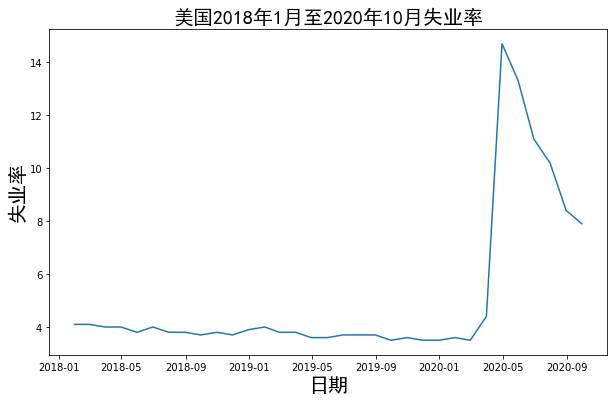

In [7]:
#失业率
x = unem
plt.figure(figsize=(10,6))
plt.plot(w.edb(x, t0, tn).Times, w.edb(x, t0, tn).Data[0])
plt.tick_params(axis='both',which='major',labelsize = 10)
plt.xlabel(u'日期',fontproperties='SimHei',fontsize = 20)
plt.ylabel(u'失业率',fontproperties='SimHei',fontsize = 20)
plt.title('美国'+str(int(t0[0:4]))+'年'+str(int(t0[5:7]))+'月至'+str(int(tn[0:4]))+'年'+str(int(tn[5:7]))+'月失业率',
          fontproperties='SimHei', size = 20)

## 消费者支出与信心

Text(0.5, 1.0, '美国2018年1月至2020年10月个人总收入与总支出')

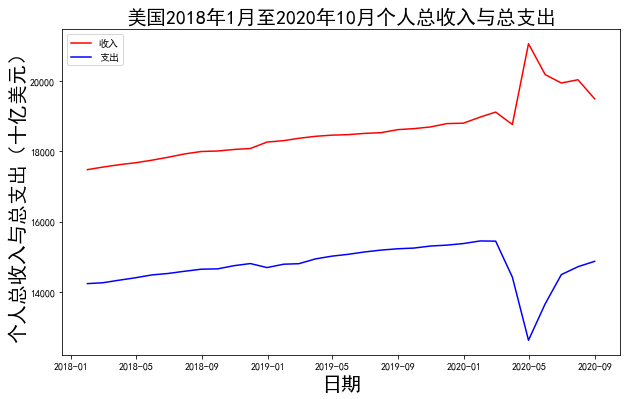

In [37]:
#个人总收入与总支出

plt.figure(figsize=(10,6))

plt.rcParams['font.family']=['SimHei']

x = p_income
inc = plt.plot(w.edb(x, t0, tn).Times, w.edb(x, t0, tn).Data[0], color = 'r')
x = p_exp
exp = plt.plot(w.edb(x, t0, tn).Times, w.edb(x, t0, tn).Data[0], color = 'b')

plt.legend(['收入', '支出'],loc = 2)

plt.tick_params(axis='both',which='major',labelsize = 10)
plt.xlabel(u'日期',fontproperties='SimHei',fontsize = 20)
plt.ylabel(u'个人总收入与总支出（十亿美元）',fontproperties='SimHei',fontsize = 20)
plt.title('美国'+str(int(t0[0:4]))+'年'+str(int(t0[5:7]))+'月至'+str(int(tn[0:4]))+'年'+str(int(tn[5:7]))+'月个人总收入与总支出',
          fontproperties='SimHei', size = 20)

Text(0.5, 1.0, '美国2018年1月至2020年10月零售额和食品服务销售额')

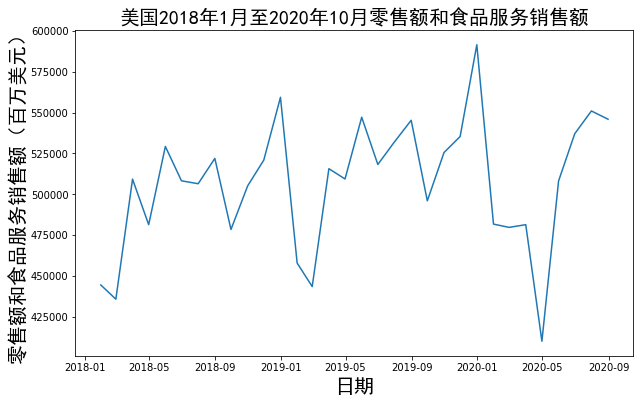

In [10]:
#零售额和食品服务销售额
x = retail
plt.figure(figsize=(10,6))
plt.plot(w.edb(x, t0, tn).Times, w.edb(x, t0, tn).Data[0])
plt.tick_params(axis='both',which='major',labelsize = 10)
plt.xlabel(u'日期',fontproperties='SimHei',fontsize = 20)
plt.ylabel(u'零售额和食品服务销售额（百万美元）',fontproperties='SimHei',fontsize = 20)
plt.title('美国'+str(int(t0[0:4]))+'年'+str(int(t0[5:7]))+'月至'+str(int(tn[0:4]))+'年'+str(int(tn[5:7]))+'月零售额和食品服务销售额',
          fontproperties='SimHei', size = 20)

## 国内产量与存货

Text(0.5, 1.0, '美国2018年1月至2020年10月国内生产总值')

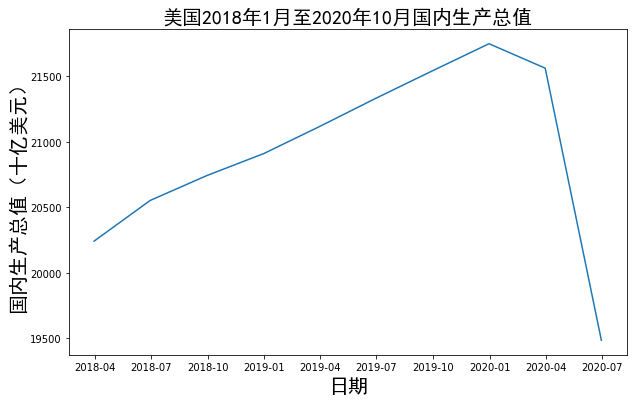

In [11]:
#国内生产总值
x = gdp

plt.figure(figsize=(10,6))
plt.plot(w.edb(x, t0, tn).Times, w.edb(x, t0, tn).Data[0])
plt.tick_params(axis='both',which='major',labelsize = 10)
plt.xlabel(u'日期',fontproperties='SimHei',fontsize = 20)
plt.ylabel(u'国内生产总值（十亿美元）',fontproperties='SimHei',fontsize = 20)
plt.title('美国'+str(int(t0[0:4]))+'年'+str(int(t0[5:7]))+'月至'+str(int(tn[0:4]))+'年'+str(int(tn[5:7]))+'月国内生产总值',
          fontproperties='SimHei', size = 20)

Text(0.5, 1.0, '美国2018年1月至2020年10月全部制造业新增订单')

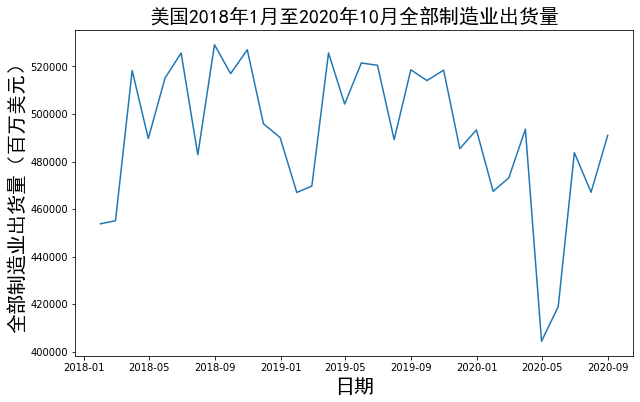

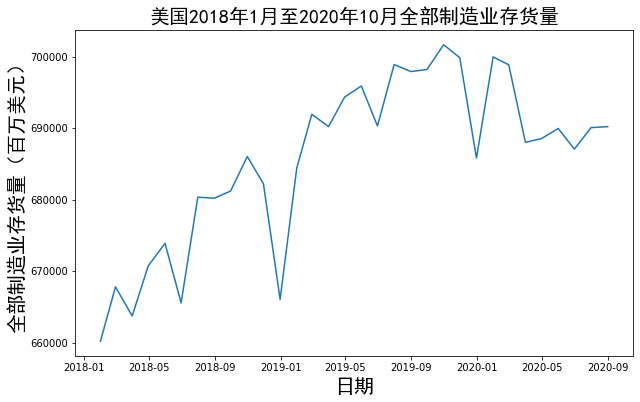

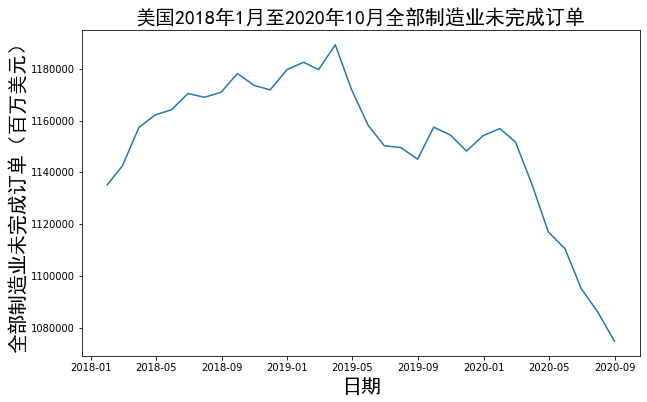

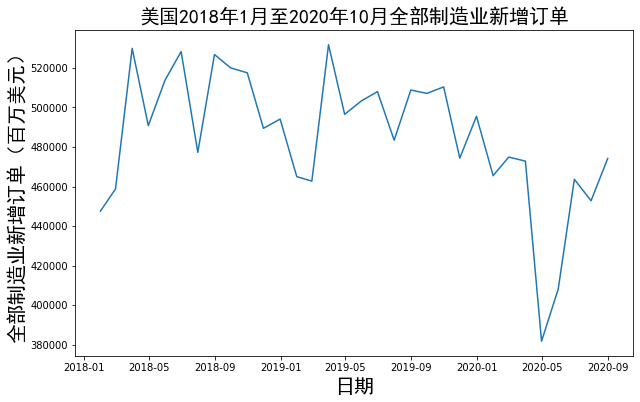

In [12]:
#全部制造业出货量

x = man_out

plt.figure(figsize=(10,6))
plt.plot(w.edb(x, t0, tn).Times, w.edb(x, t0, tn).Data[0])
plt.tick_params(axis='both',which='major',labelsize = 10)
plt.xlabel(u'日期',fontproperties='SimHei',fontsize = 20)
plt.ylabel(u'全部制造业出货量（百万美元）',fontproperties='SimHei',fontsize = 20)
plt.title('美国'+str(int(t0[0:4]))+'年'+str(int(t0[5:7]))+'月至'+str(int(tn[0:4]))+'年'+str(int(tn[5:7]))+'月全部制造业出货量',
          fontproperties='SimHei', size = 20)

#全部制造业存货量

x = man_in

plt.figure(figsize=(10,6))
plt.plot(w.edb(x, t0, tn).Times, w.edb(x, t0, tn).Data[0])
plt.tick_params(axis='both',which='major',labelsize = 10)
plt.xlabel(u'日期',fontproperties='SimHei',fontsize = 20)
plt.ylabel(u'全部制造业存货量（百万美元）',fontproperties='SimHei',fontsize = 20)
plt.title('美国'+str(int(t0[0:4]))+'年'+str(int(t0[5:7]))+'月至'+str(int(tn[0:4]))+'年'+str(int(tn[5:7]))+'月全部制造业存货量',
          fontproperties='SimHei', size = 20)

#全部制造业未完成订单

x = man_unfin

plt.figure(figsize=(10,6))
plt.plot(w.edb(x, t0, tn).Times, w.edb(x, t0, tn).Data[0])
plt.tick_params(axis='both',which='major',labelsize = 10)
plt.xlabel(u'日期',fontproperties='SimHei',fontsize = 20)
plt.ylabel(u'全部制造业未完成订单（百万美元）',fontproperties='SimHei',fontsize = 20)
plt.title('美国'+str(int(t0[0:4]))+'年'+str(int(t0[5:7]))+'月至'+str(int(tn[0:4]))+'年'+str(int(tn[5:7]))+'月全部制造业未完成订单',
          fontproperties='SimHei', size = 20)

#全部制造业新增订单

x = man_new

plt.figure(figsize=(10,6))
plt.plot(w.edb(x, t0, tn).Times, w.edb(x, t0, tn).Data[0])
plt.tick_params(axis='both',which='major',labelsize = 10)
plt.xlabel(u'日期',fontproperties='SimHei',fontsize = 20)
plt.ylabel(u'全部制造业新增订单（百万美元）',fontproperties='SimHei',fontsize = 20)
plt.title('美国'+str(int(t0[0:4]))+'年'+str(int(t0[5:7]))+'月至'+str(int(tn[0:4]))+'年'+str(int(tn[5:7]))+'月全部制造业新增订单',
          fontproperties='SimHei', size = 20)

Text(0.5, 1.0, '美国2018年1月至2020年10月制造业产能利用率')

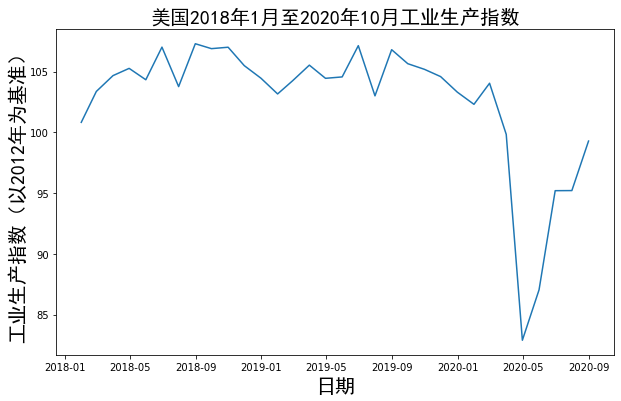

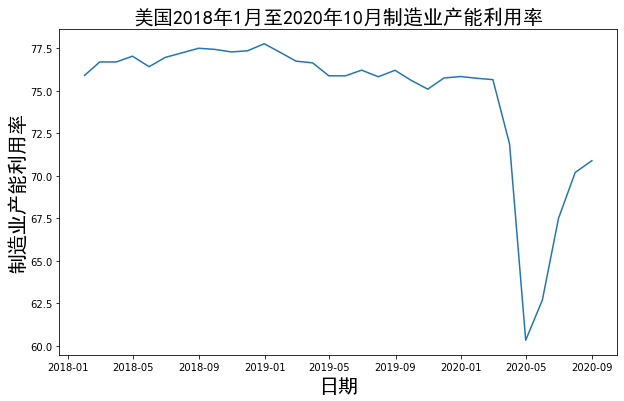

In [13]:
#工业生产指数
x = ind_ind

plt.figure(figsize=(10,6))
plt.plot(w.edb(x, t0, tn).Times, w.edb(x, t0, tn).Data[0])
plt.tick_params(axis='both',which='major',labelsize = 10)
plt.xlabel(u'日期',fontproperties='SimHei',fontsize = 20)
plt.ylabel(u'工业生产指数（以2012年为基准）',fontproperties='SimHei',fontsize = 20)
plt.title('美国'+str(int(t0[0:4]))+'年'+str(int(t0[5:7]))+'月至'+str(int(tn[0:4]))+'年'+str(int(tn[5:7]))+'月工业生产指数',
          fontproperties='SimHei', size = 20)

#制造业产能利用率
x = ind_use

plt.figure(figsize=(10,6))
plt.plot(w.edb(x, t0, tn).Times, w.edb(x, t0, tn).Data[0])
plt.tick_params(axis='both',which='major',labelsize = 10)
plt.xlabel(u'日期',fontproperties='SimHei',fontsize = 20)
plt.ylabel(u'制造业产能利用率',fontproperties='SimHei',fontsize = 20)
plt.title('美国'+str(int(t0[0:4]))+'年'+str(int(t0[5:7]))+'月至'+str(int(tn[0:4]))+'年'+str(int(tn[5:7]))+'月制造业产能利用率',
          fontproperties='SimHei', size = 20)

## 住房和建筑

Text(0.5, 1.0, '美国2018年1月至2020年10月各地区已获许可的新建私人住宅套数')

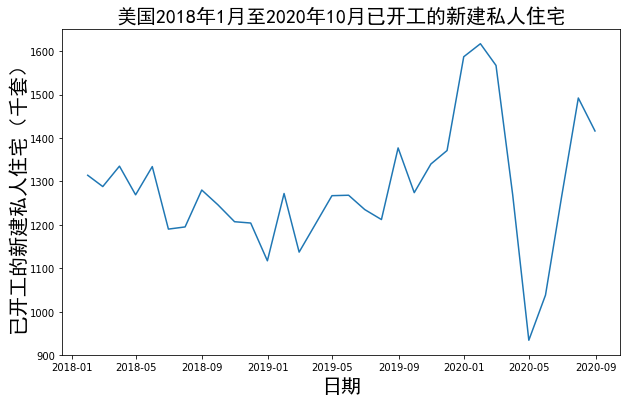

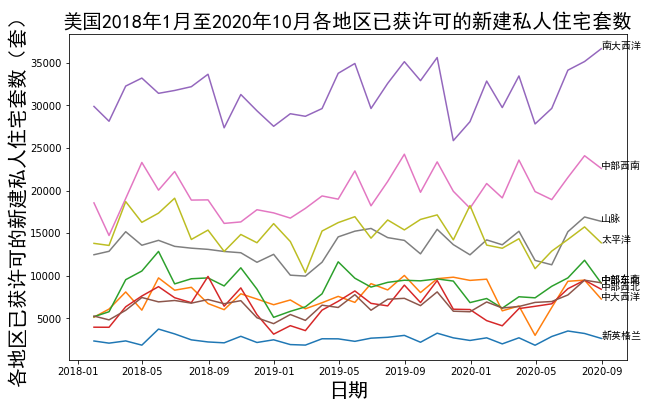

In [14]:
#已开工的新建私人住宅
x = new_house

plt.figure(figsize=(10,6))
plt.plot(w.edb(x, t0, tn).Times, w.edb(x, t0, tn).Data[0])
plt.tick_params(axis='both',which='major',labelsize = 10)
plt.xlabel(u'日期',fontproperties='SimHei',fontsize = 20)
plt.ylabel(u'已开工的新建私人住宅（千套）',fontproperties='SimHei',fontsize = 20)
plt.title('美国'+str(int(t0[0:4]))+'年'+str(int(t0[5:7]))+'月至'+str(int(tn[0:4]))+'年'+str(int(tn[5:7]))+'月已开工的新建私人住宅',
          fontproperties='SimHei', size = 20)


#各地区已获许可的新建私人住宅套数
x = new_per

plt.figure(figsize=(10,6))
for i in range(len(x)):
    plt.plot(w.edb(x[i], t0, tn).Times, w.edb(x[i], t0, tn).Data[0])
    plt.text(w.edb(x[i], t0, tn).Times[-1], w.edb(x[i], t0, tn).Data[0][-1], per_name[i], fontproperties='SimHei')
plt.tick_params(axis='both',which='major',labelsize = 10)
plt.xlabel(u'日期',fontproperties='SimHei',fontsize = 20)
plt.ylabel(u'各地区已获许可的新建私人住宅套数（套）',fontproperties='SimHei',fontsize = 20)
plt.title('美国'+str(int(t0[0:4]))+'年'+str(int(t0[5:7]))+'月至'+str(int(tn[0:4]))+'年'+str(int(tn[5:7]))
          +'月各地区已获许可的新建私人住宅套数',
          fontproperties='SimHei', size = 20)


## 价格、生产率和工资

Text(0.5, 1.0, '美国2018年1月至2020年10月核心CPI环比')

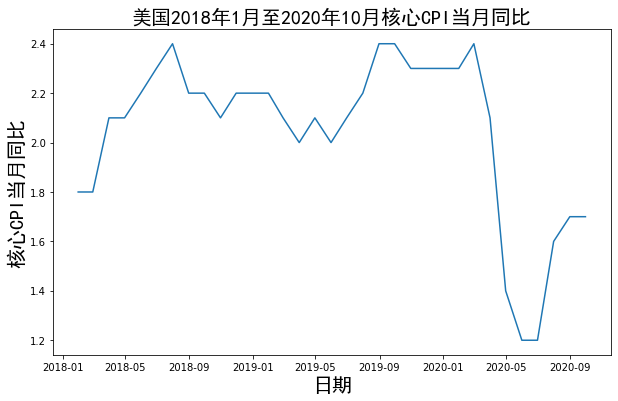

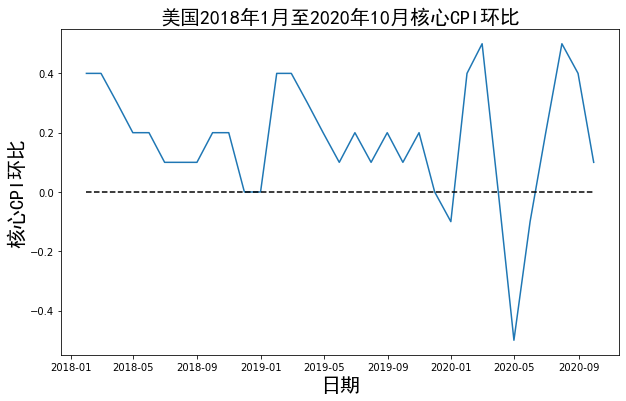

In [15]:
#核心CPI当月同比
x = cpi_tongbi

plt.figure(figsize=(10,6))
plt.plot(w.edb(x, t0, tn).Times, w.edb(x, t0, tn).Data[0])
plt.tick_params(axis='both',which='major',labelsize = 10)
plt.xlabel(u'日期',fontproperties='SimHei',fontsize = 20)
plt.ylabel(u'核心CPI当月同比',fontproperties='SimHei',fontsize = 20)
plt.title('美国'+str(int(t0[0:4]))+'年'+str(int(t0[5:7]))+'月至'+str(int(tn[0:4]))+'年'+str(int(tn[5:7]))+'月核心CPI当月同比',
          fontproperties='SimHei', size = 20)

#核心CPI环比
x = cpi_huanbi

plt.figure(figsize=(10,6))
plt.plot(w.edb(x, t0, tn).Times, w.edb(x, t0, tn).Data[0] )
plt.plot(w.edb(x, t0, tn).Times, [0]*len(w.edb(x, t0, tn).Times), linestyle='--', color = 'black' )
plt.tick_params(axis='both',which='major',labelsize = 10)
plt.xlabel(u'日期',fontproperties='SimHei',fontsize = 20)
plt.ylabel(u'核心CPI环比',fontproperties='SimHei',fontsize = 20)
plt.title('美国'+str(int(t0[0:4]))+'年'+str(int(t0[5:7]))+'月至'+str(int(tn[0:4]))+'年'+str(int(tn[5:7]))+'月核心CPI环比',
          fontproperties='SimHei', size = 20)

Text(0.5, 1.0, '美国2018年1月至2020年10月PPI最终需求')

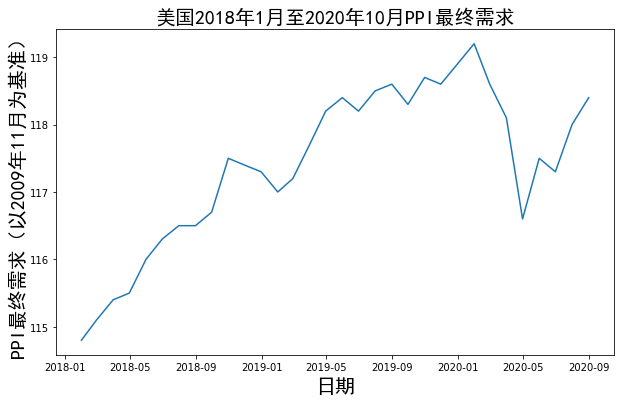

In [16]:
#PPI最终需求
x = ppi

plt.figure(figsize=(10,6))
plt.plot(w.edb(x, t0, tn).Times, w.edb(x, t0, tn).Data[0] )
plt.tick_params(axis='both',which='major',labelsize = 10)
plt.xlabel(u'日期',fontproperties='SimHei',fontsize = 20)
plt.ylabel(u'PPI最终需求（以2009年11月为基准）',fontproperties='SimHei',fontsize = 20)
plt.title('美国'+str(int(t0[0:4]))+'年'+str(int(t0[5:7]))+'月至'+str(int(tn[0:4]))+'年'+str(int(tn[5:7]))+'月PPI最终需求',
          fontproperties='SimHei', size = 20)

## 债券市场指数：十年国债收益率

Text(0.5, 1.0, '美国2018年1月至2020年10月十年国债收益率')

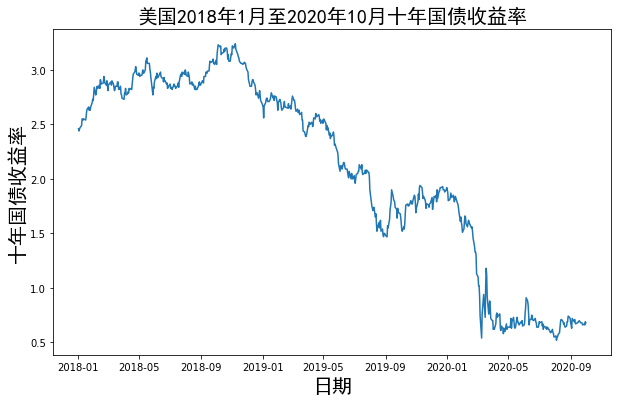

In [17]:
x = bond_10y
plt.figure(figsize=(10,6))
plt.plot(w.edb(x, t0, tn).Times, w.edb(x, t0, tn).Data[0])
plt.tick_params(axis='both',which='major',labelsize = 10)
plt.xlabel(u'日期',fontproperties='SimHei',fontsize = 20)
plt.ylabel(u'十年国债收益率',fontproperties='SimHei',fontsize = 20)
plt.title('美国'+str(int(t0[0:4]))+'年'+str(int(t0[5:7]))+'月至'+str(int(tn[0:4]))+'年'+str(int(tn[5:7]))+'月十年国债收益率',
          fontproperties='SimHei', size = 20)

## ECRI领先指标

Text(0.5, 1.0, '美国2018年1月至2020年10月ECRI领先指标')

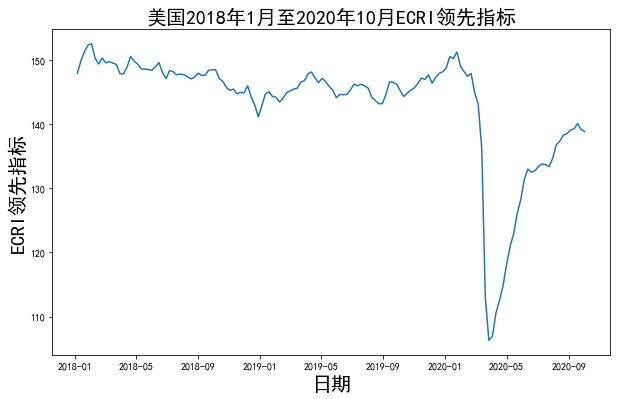

In [39]:
#ECRI领先指标
x = ecri
plt.figure(figsize=(10,6))
plt.plot(w.edb(x, t0, tn).Times, w.edb(x, t0, tn).Data[0])
plt.tick_params(axis='both',which='major',labelsize = 10)
plt.xlabel(u'日期',fontproperties='SimHei',fontsize = 20)
plt.ylabel(u'ECRI领先指标',fontproperties='SimHei',fontsize = 20)
plt.title('美国'+str(int(t0[0:4]))+'年'+str(int(t0[5:7]))+'月至'+str(int(tn[0:4]))+'年'+str(int(tn[5:7]))+'月ECRI领先指标',
          fontproperties='SimHei', size = 20)

## 制造业PMI（采购经理指数）

Text(0.5, 1.0, '美国2018年1月至2020年10月制造业PMI')

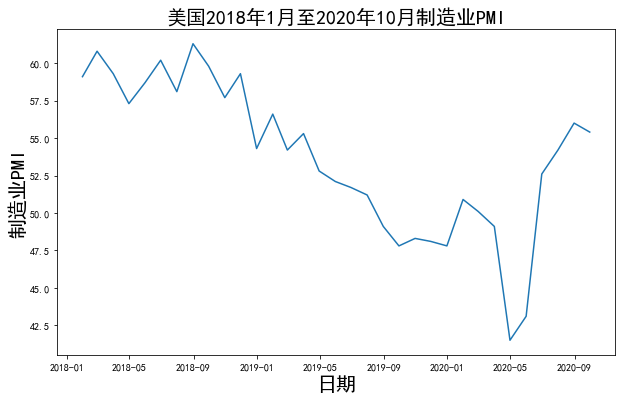

In [42]:
#制造业PMI

x = pmi
plt.figure(figsize=(10,6))
plt.plot(w.edb(x, t0, tn).Times, w.edb(x, t0, tn).Data[0])
plt.tick_params(axis='both',which='major',labelsize = 10)
plt.xlabel(u'日期',fontproperties='SimHei',fontsize = 20)
plt.ylabel(u'制造业PMI',fontproperties='SimHei',fontsize = 20)
plt.title('美国'+str(int(t0[0:4]))+'年'+str(int(t0[5:7]))+'月至'+str(int(tn[0:4]))+'年'+str(int(tn[5:7]))+'月制造业PMI',
          fontproperties='SimHei', size = 20)

## 新建住房销售

Text(0.5, 1.0, '美国2018年1月至2020年10月新建住房销售与已开工的新建私人住宅')

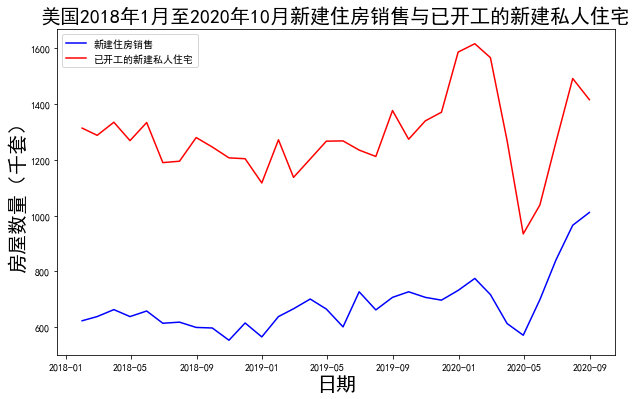

In [84]:
#新建住房销售（千套）

plt.rcParams['font.family']=['SimHei']

plt.figure(figsize=(10,6))

x = new_hs
plt.plot(w.edb(x, t0, tn).Times, w.edb(x, t0, tn).Data[0], c = 'b')

x = new_house
plt.plot(w.edb(x, t0, tn).Times, w.edb(x, t0, tn).Data[0], c = 'r')

plt.legend(['新建住房销售', '已开工的新建私人住宅'],loc = 2)

plt.tick_params(axis='both',which='major',labelsize = 10)
plt.xlabel(u'日期',fontproperties='SimHei',fontsize = 20)
plt.ylabel(u'房屋数量（千套）',fontproperties='SimHei',fontsize = 20)
plt.title('美国'+str(int(t0[0:4]))+'年'+str(int(t0[5:7]))+'月至'+str(int(tn[0:4]))+'年'+str(int(tn[5:7]))+
          '月新建住房销售与已开工的新建私人住宅',
          fontproperties='SimHei', size = 20)

# 数据填充/删除函数

In [ ]:
def learntime(data, learned):
    times = learned.Times
    
    
    

In [71]:
learned = w.edb(unem, t0, tn)
print(w.edb(unem, t0, tn).Times[0])
print(w.edb(unem, t0, tn).Times[-1])
print(len(w.edb(unem, t0, tn).Times))

2018-01-31
2020-09-30
33


In [78]:
(learned.Times[-1] - learned.Times[0]).days

972

In [70]:
print(w.edb(p_income, t0, tn).Times[0])
print(w.edb(p_income, t0, tn).Times[-1])
print(len(w.edb(p_income, t0, tn).Times))

2018-01-31
2020-08-31
32


# 尝试拟合模型

In [ ]:
#线性回归
new_nonagr = 'G1137704'
unem = 'G0000067'

p_income = 'G0003879'
p_exp = 'G0003882'
retail = 'G1112987'

gdp = 'G0000003' #季度
ind_ind = 'G1120821'
ind_use = 'G1110601'
man_out = 'G0003713'
man_in = 'G0003715'
man_unfin = 'G0003717'
man_new = 'G0003719'

new_house = 'G0003622'

cpi_tongbi = 'G0000029'
cpi_huanbi = 'G0000033'
ppi = 'G1138391'

ecri = 'G1100287'
pmi = 'G0002323'


#十年国债收益率
bond_10y = 'G0000891'

In [50]:
x = []
names = [new_nonagr, unem, p_income, p_exp, retail, gdp, ind_ind, ind_use, man_out, man_in, man_unfin, man_new, new_house,
         cpi_tongbi, cpi_huanbi, ppi]

for i in names:
    x.append(w.edb(i, t0, tn).Data[0])
    

33
33
32
32
32
10
32
32
32
32
32
32
32
33
33
32


In [ ]:
mod_lr = LinearRegression()
mod_lr.fit(train_x, )
valid_pred_lr = mod_lr.predict(valid_x)